# SE-PQA - plots for the presentation

Armanni Luca - 509085

Ghiotto Alessandro - 513944

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
######## ANSWERS

corpus_df = pd.read_json('PIR_data/answer_retrieval/subset_answers.json', orient='index')
corpus_df = corpus_df.reset_index()
corpus_df.columns = ['docno', 'text']

### QUESTIONS
 
train_queries = pd.read_json('PIR_data/answer_retrieval/train/subset_data.jsonl', lines=True)
val_queries = pd.read_json('PIR_data/answer_retrieval/val/subset_data.jsonl', lines=True)
test_queries = pd.read_json('PIR_data/answer_retrieval/test/subset_data.jsonl', lines=True)

### FULL DATA
answers = pd.read_csv("PIR_data/answers.csv",engine="python",on_bad_lines="skip")
questions = pd.read_csv("PIR_data/questions.csv",engine="python",on_bad_lines="skip")

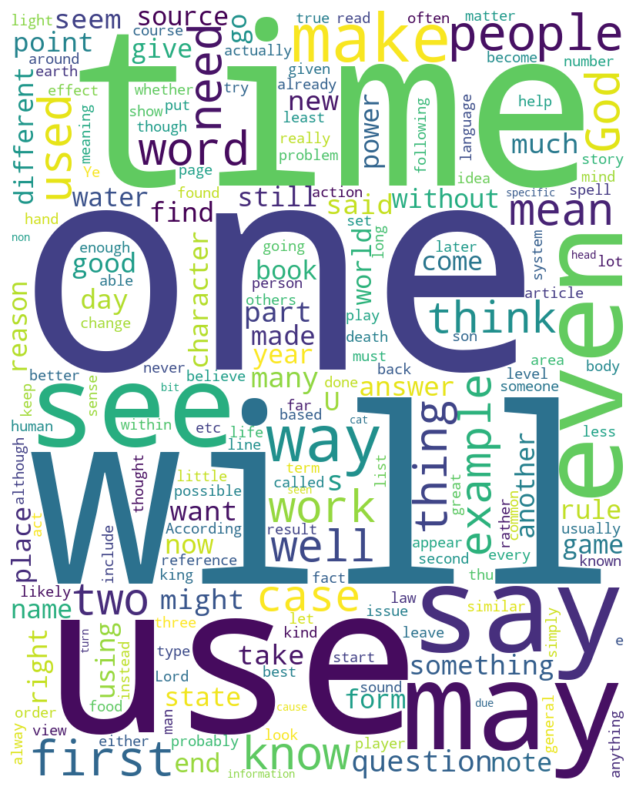

In [3]:
from wordcloud import WordCloud, STOPWORDS

# here we take a look at the word cloud, 
# this helps us to understand the most common words in the corpus
wordcloud = WordCloud(
    width=800, 
    height=1000, 
    background_color='white', 
    stopwords=STOPWORDS
    ).generate(' '.join(corpus_df['text']))

plt.figure(figsize=(8, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

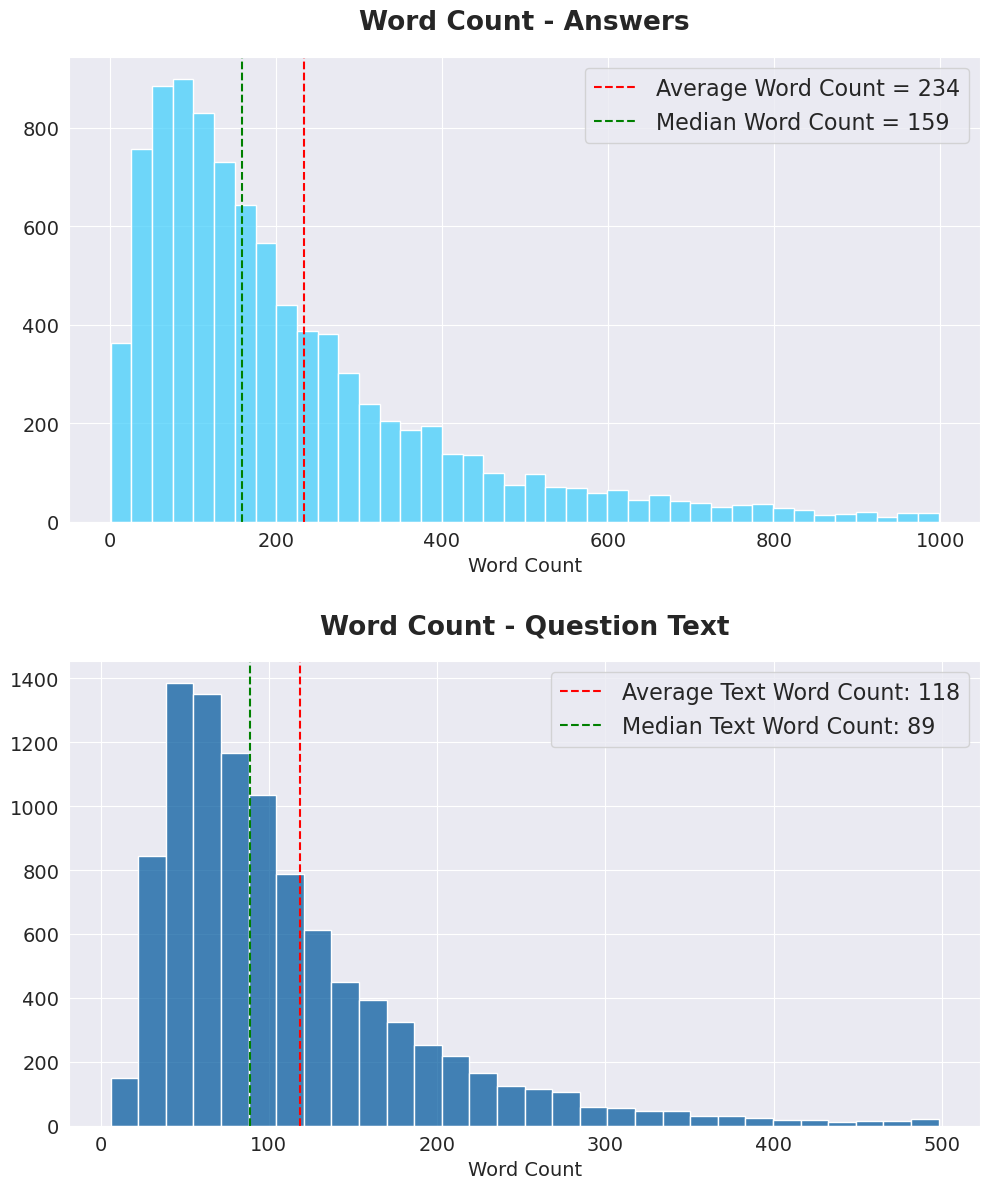

In [4]:
# Example data: Replace these with your actual data loading code
word_count = corpus_df['text'].apply(lambda x: len(x.split()))
train_queries = pd.read_json('PIR_data/answer_retrieval/train/subset_data.jsonl', lines=True)
word_count_text = train_queries['text'].apply(lambda x: len(x.split()))

# Initialize the figure
plt.figure(figsize=(10, 12))  # Adjusted the figure height to accommodate two plots

COLORS = ['#45d0fc', '#085da0']

# Plot 1: Distribution of word count in answers
plt.subplot(2, 1, 1)
threshold = 1000
filtered_word_count = word_count[word_count < threshold]
sns.histplot(filtered_word_count, bins=40, color=COLORS[0])
plt.axvline(word_count.mean(), color='r', linestyle='--', label=f'Average Word Count = {int(word_count.mean())}')
plt.axvline(word_count.median(), color='g', linestyle='--', label=f'Median Word Count = {int(word_count.median())}')
plt.legend(fontsize=16)
plt.title('Word Count - Answers', fontsize=19, pad=20, fontweight='bold')
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.xticks(fontsize=14)  # Set x-axis tick font size
plt.yticks(fontsize=14)  # Set y-axis tick font size

# Plot 2: Distribution of text length in train queries
plt.subplot(2, 1, 2)
threshold_text = 500
filtered_word_count_text = word_count_text[word_count_text < threshold_text]
sns.histplot(filtered_word_count_text, bins=30, color=COLORS[1])
plt.axvline(word_count_text.mean(), color='r', linestyle='--', label=f'Average Text Word Count: {int(word_count_text.mean())}')
plt.axvline(word_count_text.median(), color='g', linestyle='--', label=f'Median Text Word Count: {int(word_count_text.median())}')
plt.legend(fontsize=16)
plt.title('Word Count - Question Text', fontsize=19, pad=20, fontweight='bold')
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.xticks(fontsize=14)  # Set x-axis tick font size
plt.yticks(fontsize=14)  # Set y-axis tick font size

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Adds vertical space between subplots
plt.show()


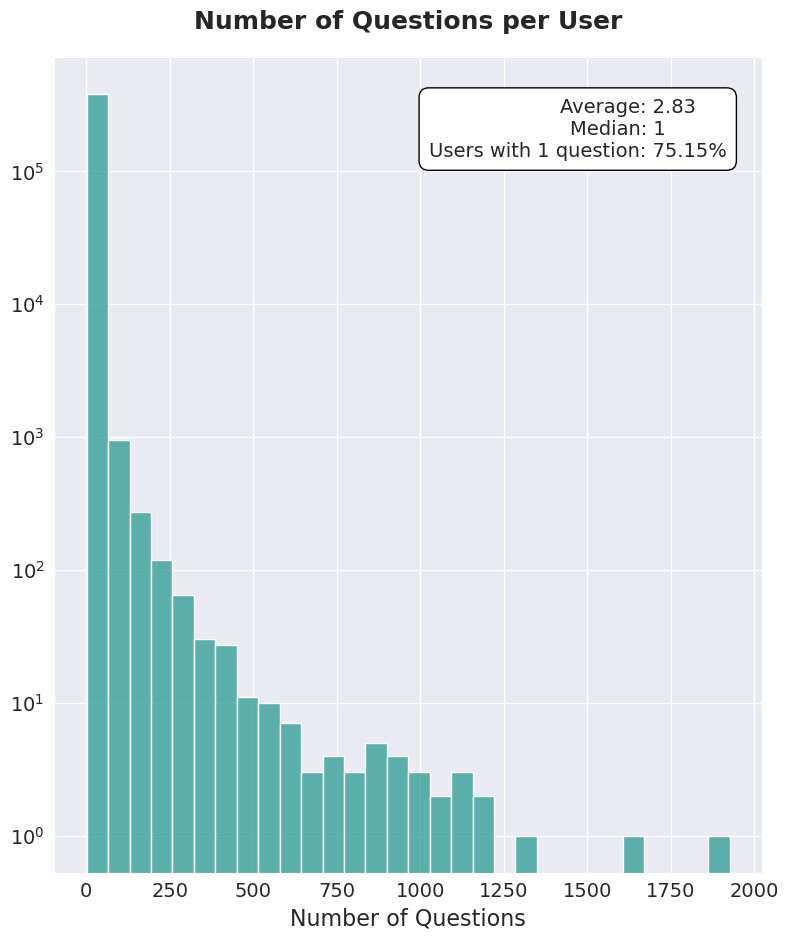

In [5]:
# Group the questions by user and count the number of questions for each user
user_question_counts = questions.groupby('AccountId').size()

# Compute statistics
average_questions = user_question_counts.mean()
median_questions = user_question_counts.median()
percentage_one_question = (user_question_counts == 1).mean() * 100  # Percentage of users with exactly one question

# Plot the distribution of the number of questions per user
plt.figure(figsize=(8, 9.5))
sns.histplot(user_question_counts, bins=30, color='#2a9d8f')
plt.yscale('log')  # Log scale for better visualization of distribution

# Add a statistics box
stats_text = (
    f"Average: {average_questions:.2f}     \n"
    f"Median: {int(median_questions)}          \n"
    f"Users with 1 question: {percentage_one_question:.2f}%"
)
plt.gca().text(
    0.95, 0.95, stats_text,
    transform=plt.gca().transAxes,
    fontsize=14, 
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

# Add labels and title
plt.title('Number of Questions per User', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Number of Questions', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.xticks(fontsize=14)  # Set x-axis tick font size
plt.yticks(fontsize=14)  # Set y-axis tick font size
plt.tight_layout()
plt.show()


---

<Figure size 1500x500 with 0 Axes>

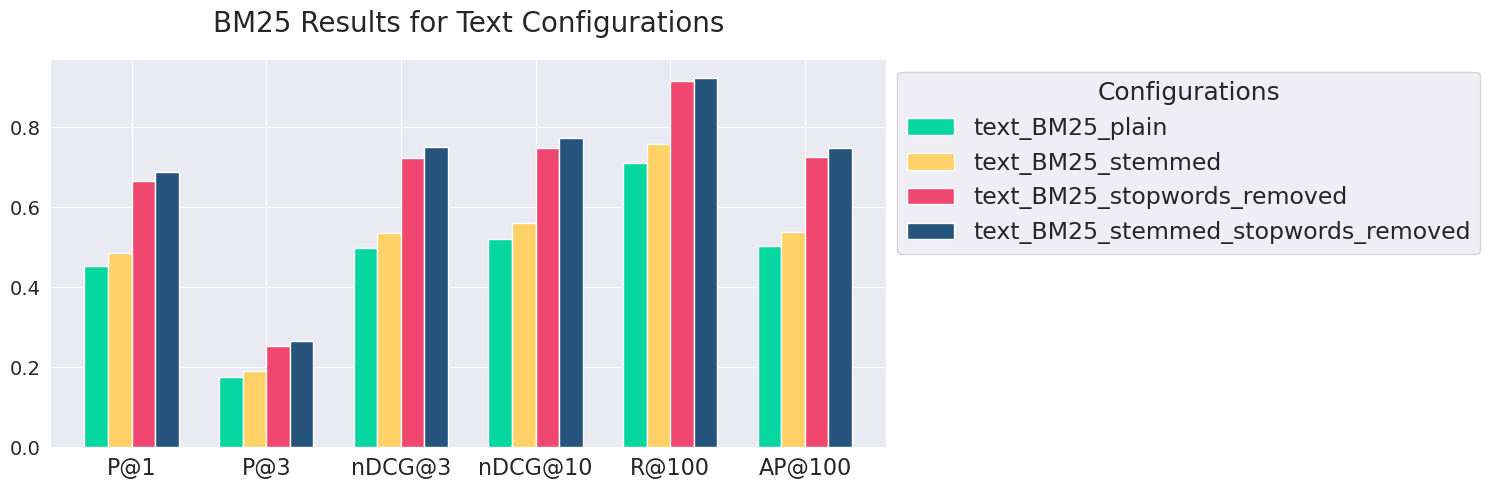

In [6]:
path = "./experiments/baseline/results_baseline.csv"
results_df = pd.read_csv(path, index_col=0)
results_df = results_df.set_index('name')

# Filter the results for text_BM25
results_df = results_df.drop('mrt', axis=1)
text_bm25_results = results_df.filter(like='text_BM25', axis=0)
measures_to_plot = text_bm25_results.columns

# Plot the results
colors = ['#06d6a0', '#ffd166', '#ef476f', '#26547c']
plt.figure(figsize=(15, 5))

# Transpose and plot BM25 results
text_bm25_results.T.plot(
    kind='bar',
    color=colors,
    figsize=(15, 5),
    legend=True,
    width=0.7
)

# Remove axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Customizing the plot
plt.title('BM25 Results for Text Configurations', fontsize=20, pad=20)
plt.xlabel('')
plt.ylabel('')

# Customizing ticks
plt.xticks(fontsize=16, rotation=0)  # Larger x-ticks and no rotation
plt.yticks(fontsize=14)  # Larger y-ticks

# Customizing legend
plt.legend(
    title='Configurations',
    title_fontsize=18,
    fontsize=17,
    bbox_to_anchor=(1, 1), 
    loc='upper left',
)

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 1500x500 with 0 Axes>

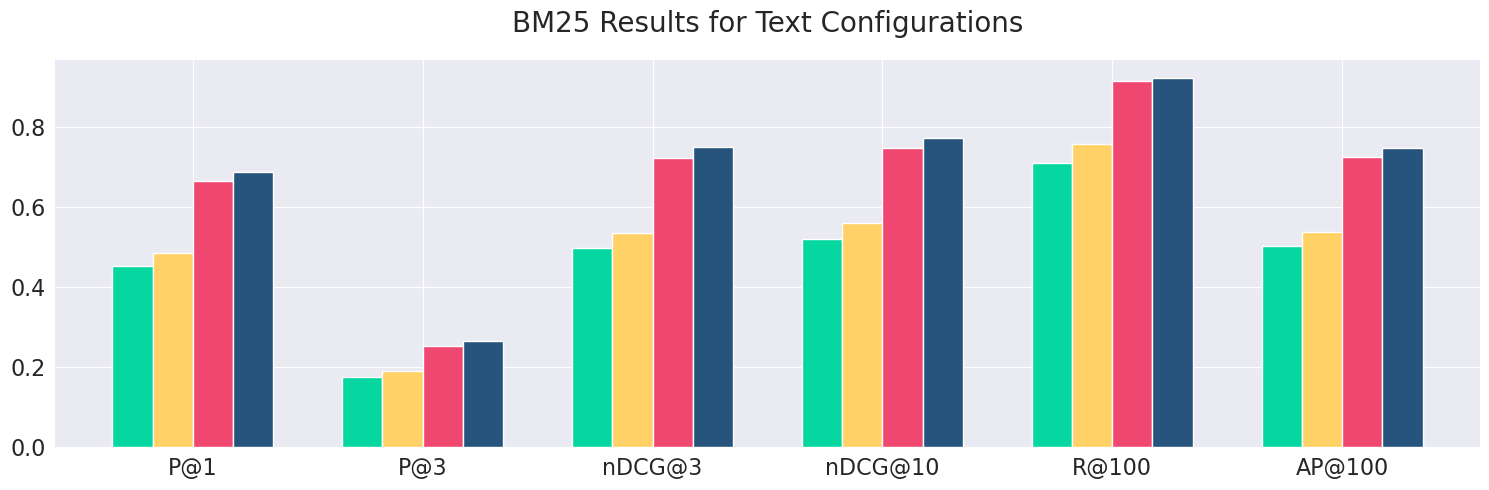

In [7]:
path = "./experiments/baseline/results_baseline.csv"
results_df = pd.read_csv(path, index_col=0)
results_df = results_df.set_index('name')

# Filter the results for text_BM25
results_df = results_df.drop('mrt', axis=1)
text_bm25_results = results_df.filter(like='text_BM25', axis=0)
measures_to_plot = text_bm25_results.columns

# Plot the results
colors = ['#06d6a0', '#ffd166', '#ef476f', '#26547c']
plt.figure(figsize=(15, 5))

# Transpose and plot BM25 results
text_bm25_results.T.plot(
    kind='bar',
    color=colors,
    figsize=(15, 5),
    legend=False,
    width=0.7
)

# Remove axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Customizing the plot
plt.title('BM25 Results for Text Configurations', fontsize=20, pad=20)
plt.xlabel('')
plt.ylabel('')

# Customizing ticks
plt.xticks(fontsize=16, rotation=0)  # Larger x-ticks and no rotation
plt.yticks(fontsize=16)  # Larger y-ticks

# Adjust layout
plt.tight_layout()
plt.show()


---

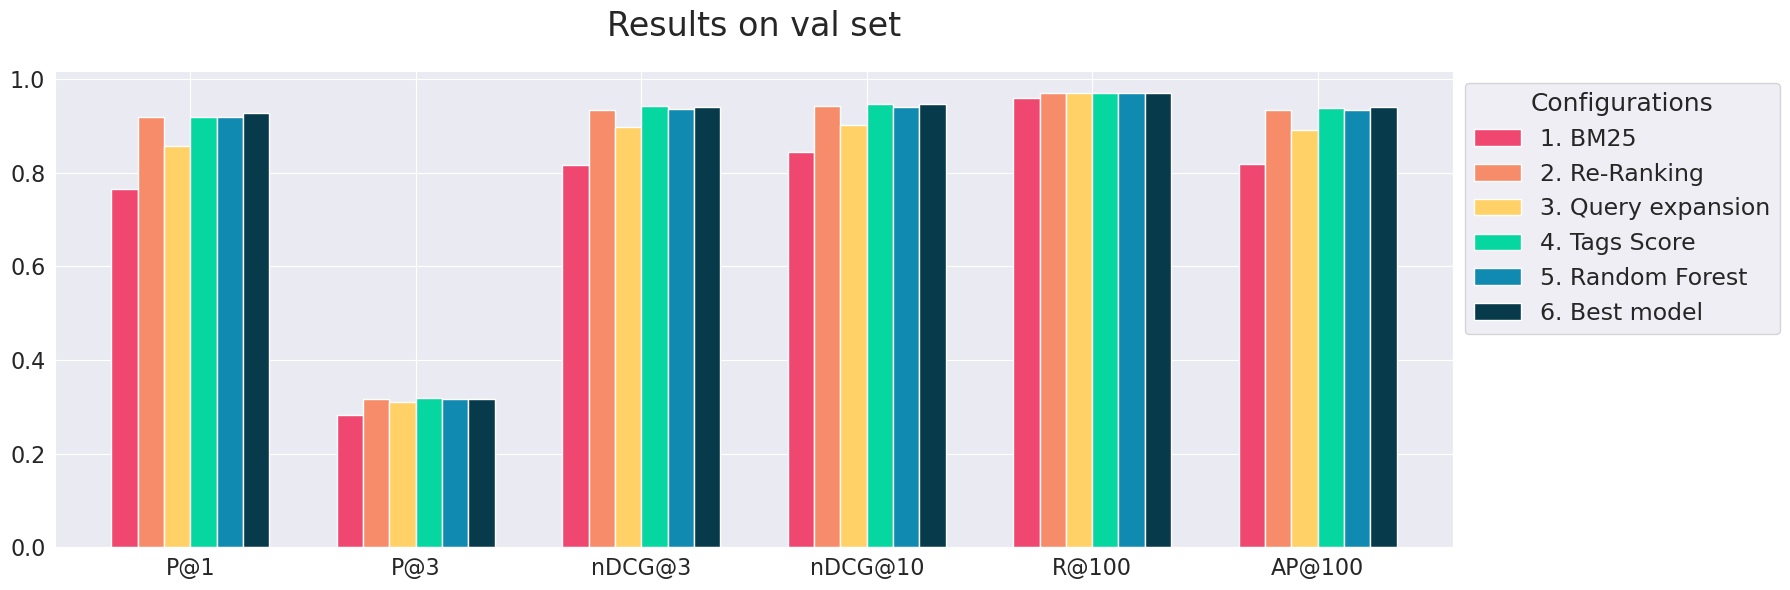

In [8]:
# Load the data
path = "./experiments/results_val_final.csv"
results = pd.read_csv(path, index_col=0)

# Prepare the data
plot_df = results.drop('mrt', axis=1).set_index('name')
plot_df = plot_df.drop('Bi-Encoder')

# Define names and colors
names = ['1. BM25', '2. Re-Ranking', '4. Tags Score', '6. Best model', '5. Random Forest', '3. Query expansion']
colors = ['#ef476f', '#f78c6b', '#ffd166', '#06d6a0', '#118ab2', '#073b4c', '#aaaaaa']

# Rename the index using the `names` list
plot_df.index = names

# Reorder rows based on the first number in the index
plot_df = plot_df.sort_index(key=lambda x: [int(i.split('.')[0]) for i in x])

# Plot the data
ax = plot_df.T.plot(kind='bar', figsize=(18, 6), color=colors, width=0.7)

# Customize the plot
plt.title('Results on val set', fontsize=24, pad=25)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=16, rotation=0)  # Larger x-ticks and no rotation
plt.yticks(fontsize=16)  # Larger y-ticks
plt.legend(title='Configurations', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize=18, fontsize=17,)
plt.grid(True)

plt.tight_layout()
plt.show()
